# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**importing the dataset**

In [2]:
dataset = pd.read_csv('data_adil.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430209 entries, 0 to 430208
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   A       430209 non-null  float64
 1   B       430209 non-null  int64  
 2   C       430209 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.8 MB


In [4]:
dataset=dataset.drop(columns=['B'])

In [5]:
dataset.describe()

,A,C
count,430209.000000,430209.000000
mean,-7.240680,0.473959
std,18.383253,0.265684
min,-50.020000,0.131771
25%,0.000000,0.199621
50%,0.000000,0.474675
75%,0.000000,0.699925
max,50.600000,1.000000


**Data preprocessing**

In [6]:
X=dataset.iloc[:,0].values.reshape((-1,1))
y=dataset.iloc[:,1].values.reshape((-1,1))

In [7]:
print(X.shape)
print(y.shape)

(430209, 1)
(430209, 1)


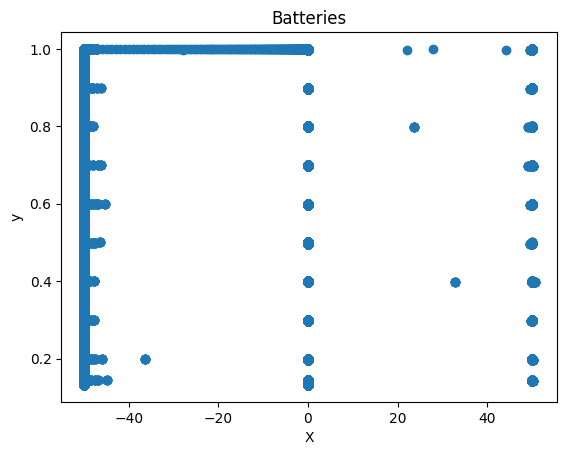

In [8]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Batteries')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#Encoding and scaling the input variable
ct = ColumnTransformer(transformers=[('scaler',StandardScaler(),[0])]
                       ,remainder='passthrough')
ct.fit(X)
X = np.array(ct.transform(X))

In [10]:
X[0:10,:]

array([[0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418],
       [0.39387418]])

In [11]:
y=(y>0.5).astype(int)

In [12]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

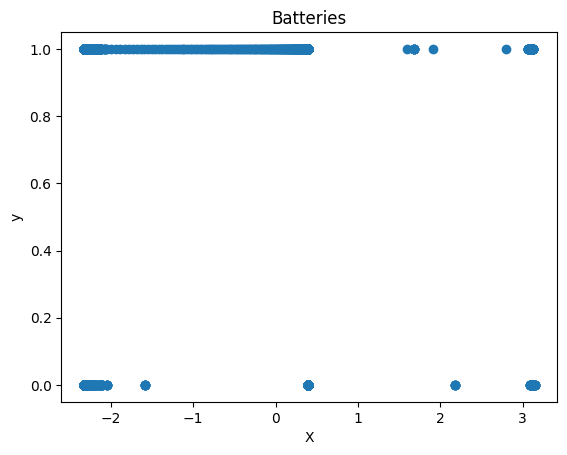

In [13]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Batteries')
plt.show()

**Spliting the data into train and test set**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training and params tuning

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()

In [16]:
# Define the XGBoost classifier
model = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Define the GridSearchCV parameters
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [17]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
best_params

In [ ]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 300)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(cm)

In [ ]:
print(accuracy)

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

In [ ]:
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)

In [ ]:
print(cm)
print(accuracy)

**Using CNN**

In [21]:
import tensorflow as tf
# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [22]:
# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=10,
          batch_size=32,
          validation_data=(X_test, y_test))


Epoch 1/10
10756/10756 [==============================] - 46s 4ms/step - loss: 0.6698 - accuracy: 0.6071 - val_loss: 0.6685 - val_accuracy: 0.6088
Epoch 2/10
10756/10756 [==============================] - 49s 5ms/step - loss: 0.6694 - accuracy: 0.6073 - val_loss: 0.6681 - val_accuracy: 0.6089
Epoch 3/10
10756/10756 [==============================] - 49s 5ms/step - loss: 0.6694 - accuracy: 0.6071 - val_loss: 0.6681 - val_accuracy: 0.6089
Epoch 4/10
10756/10756 [==============================] - 44s 4ms/step - loss: 0.6694 - accuracy: 0.6071 - val_loss: 0.6684 - val_accuracy: 0.6088
Epoch 5/10
10756/10756 [==============================] - 43s 4ms/step - loss: 0.6694 - accuracy: 0.6071 - val_loss: 0.6684 - val_accuracy: 0.6089
Epoch 6/10
10756/10756 [==============================] - 44s 4ms/step - loss: 0.6695 - accuracy: 0.6070 - val_loss: 0.6682 - val_accuracy: 0.6089
Epoch 7/10
10756/10756 [==============================] - 43s 4ms/step - loss: 0.6694 - accuracy: 0.6071 - val_loss: 0

In [24]:
import joblib
# Save the model
zip(model.save('my_model'))

# Save the column transformer
joblib.dump(ct, 'preprocessor.joblib')

['preprocessor.joblib']

In [27]:
model.save('my_model.h5')